In [99]:
# Import necessary modules,
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.preprocessing import normalize
from sklearn.model_selection import learning_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import validation_curve

In [50]:
monk1_train = pd.read_csv('data/monks-1.train',header=None,sep=" ")
monk1_test = pd.read_csv('data/monks-1.test',header=None,sep=" ")

In [51]:
monk1_train.drop(0,axis=1,inplace=True)
monk1_train.drop(8,axis=1,inplace=True)

monk1_test.drop(0,axis=1,inplace=True)
monk1_test.drop(8,axis=1,inplace=True)

In [52]:
#monk1_train

In [53]:
#monk1_test

In [54]:
columns = ['class', 'a1', 'a2', 'a3', 'a4', 'a4', 'a6']
monk1_train.columns = columns
monk1_test.columns = columns

In [55]:
#monk1_test

In [56]:
ytr = monk1_train.iloc[:,0]
xtr = monk1_train.iloc[:,1:]


xts = monk1_test.iloc[:,1:]
yts = monk1_test.iloc[:,0]

In [57]:
#yts

In [58]:
#ytr

In [59]:
scaler = StandardScaler()
xtr = scaler.fit_transform(xtr)
xts = scaler.fit_transform(xts)

In [60]:
type(xtr)

numpy.ndarray

# Grid search & CV for best parameters

In [61]:
model = KNeighborsClassifier()

k_range = [15,18,20]
algos = ['auto','ball_tree','kd_tree','brute']
metrics = ['euclidean','manhattan','cityblock']
p=[1,2]
weights=['uniform','distance']

param_grid = dict(n_neighbors=k_range,algorithm=algos,metric=metrics,p=p,weights=weights)
  
# defining parameter range
grid = GridSearchCV(model, param_grid, cv=10, scoring='accuracy', return_train_score=True,verbose=1,refit=True)
  
# fitting the model for grid search
grid_search=grid.fit(xtr, ytr)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


In [62]:
print(grid_search.best_params_)

{'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 20, 'p': 1, 'weights': 'distance'}


In [63]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 74.36%


# Check on unseen data

In [64]:
y_pred=grid_search.predict(xts) 

test_accuracy=accuracy_score(yts,y_pred)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 77.08%


/Users/dylan/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


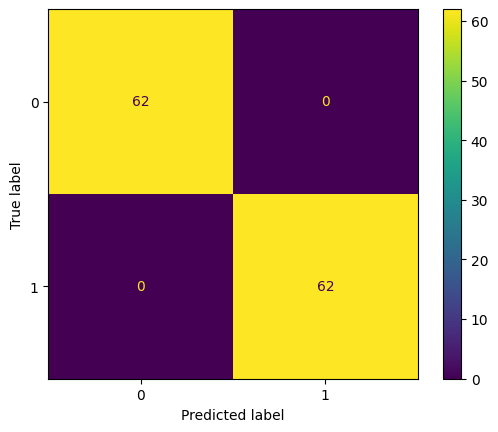

In [65]:
plot_confusion_matrix(grid,xtr, ytr,values_format='d' )

# Accuracy on TR and VL

# Overfitting

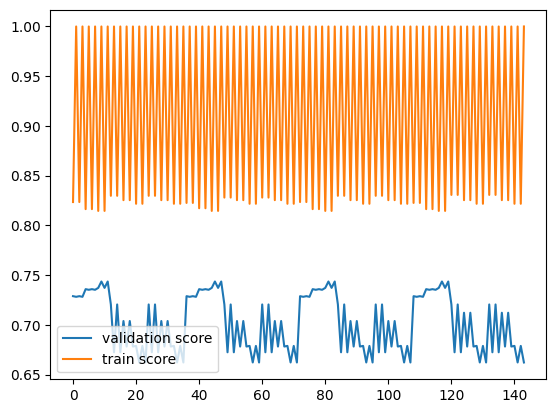

In [66]:
validation_scores = grid_search.cv_results_['mean_test_score']
train_scores = grid_search.cv_results_['mean_train_score'] 
plt.plot(validation_scores, label='validation score')
plt.plot(train_scores, label='train score')
plt.legend(loc='best')
plt.show()

# Validation curve

In [67]:
param_range = [45,50]
train_scores, validation_scores = validation_curve(model, xtr, ytr, param_name="n_neighbors", cv=60, param_range=param_range)

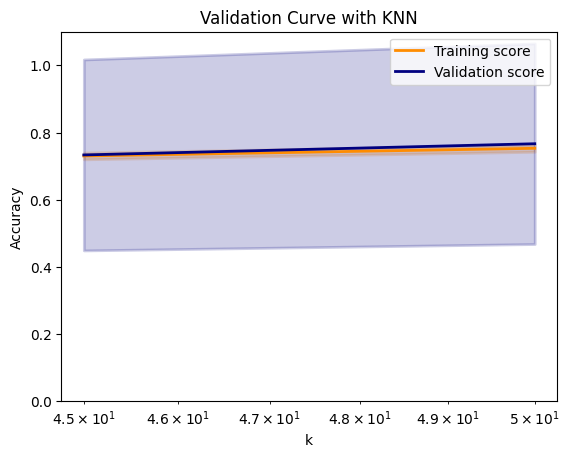

In [68]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

plt.title("Validation Curve with KNN")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    param_range, validation_scores_mean, label="Validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    validation_scores_mean - validation_scores_std,
    validation_scores_mean + validation_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()

# Best trade off is on 45<k<50, before 45 is overfitting, after 50 underfitting

# Learning curve

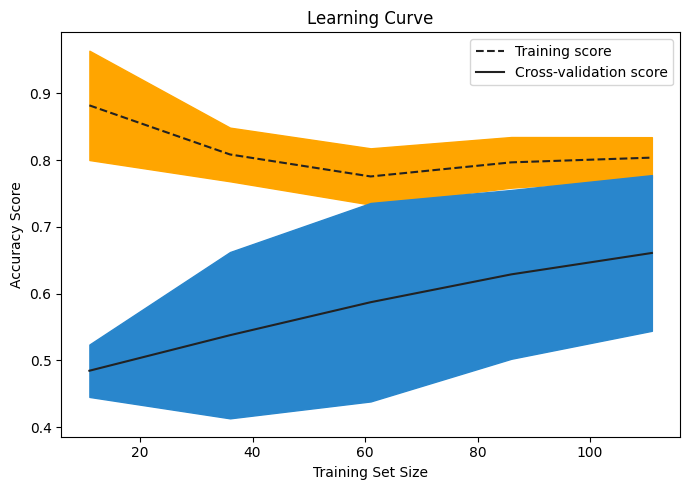

In [83]:
train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(), xtr, ytr, cv=10, scoring='accuracy', n_jobs=-1, 
                                                        )
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(7,5))
plt.plot(train_sizes, train_mean,'--', color="#222222",  label="Training score")
plt.plot(train_sizes, test_mean, color="#222222", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#FFA500")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#2986CC")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

# Grid search with new information from the val_curve

In [405]:
new_model = KNeighborsClassifier()

k_range = [x for x in range(46,50)]
algos = ['auto','ball_tree','kd_tree','brute']
metrics = ['euclidean','manhattan','cityblock']
p=[1,2]
weights=['uniform','distance']

param_grid = dict(n_neighbors=k_range,algorithm=algos,metric=metrics,p=p,weights=weights)
  
# defining parameter range
new_grid = GridSearchCV(new_model, param_grid, cv=60, scoring='accuracy', return_train_score=True,verbose=1,refit=True)
  
# fitting the model for grid search
new_grid_search=new_grid.fit(xtr, ytr)

Fitting 60 folds for each of 192 candidates, totalling 11520 fits


In [406]:
print(new_grid_search.best_params_)

{'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 49, 'p': 1, 'weights': 'distance'}


In [407]:
accuracy = new_grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 78.33%


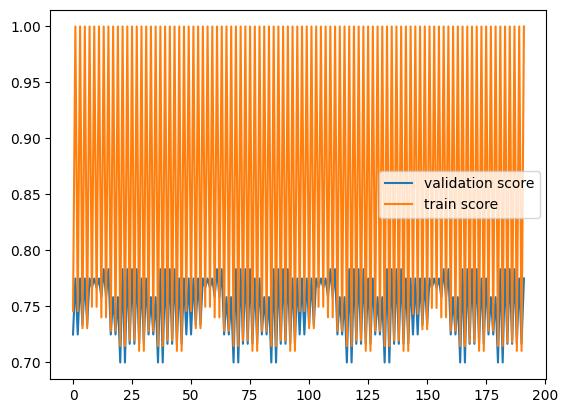

In [414]:
validation_scores = new_grid_search.cv_results_['mean_test_score']
train_scores = new_grid_search.cv_results_['mean_train_score'] 
plt.plot(validation_scores, label='validation score')
plt.plot(train_scores, label='train score')
plt.legend(loc='best')
plt.show()

# Check on unseen data

In [408]:
y_pred=new_grid_search.predict(xts) 

test_accuracy=accuracy_score(yts,y_pred)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 74.77%


# With one-hot encoding

In [409]:
monk1_train = pd.read_csv('data/monks-1.train',header=None,sep=" ")
monk1_test = pd.read_csv('data/monks-1.test',header=None,sep=" ")


columns = ['class', 'a1', 'a2', 'a3', 'a4', 'a4', 'a6', 'id']
train1 = monk1_train.drop(columns=0)
train1.columns = columns
test1 = monk1_test.drop(columns=0)
test1.columns = columns

X_train1 = train1.copy()
y_train1 = X_train1['class']
X_train1 = X_train1.drop(columns='id')
X_train1 = X_train1.drop(columns='class')
X_train1 = X_train1.values

X_test1 = test1.copy()
y_test1 = X_test1['class']
X_test1 = X_test1.drop(columns='id')
X_test1 = X_test1.drop(columns='class')
X_test1 = X_test1.values

encoder = OneHotEncoder()
        
encoder.fit(X_train1)
X_train1 = encoder.transform(X_train1).toarray()
        
encoder.fit(X_test1)
X_test1 = encoder.transform(X_test1).toarray()

# GridSearch and KFold val 

##### A higher k (number of folds) means that each model is trained on a larger training set and tested on a smaller test fold. In theory, this should lead to a lower prediction error as the models see more of the available data

##### A lower k means that the model is trained on a smaller training set and tested on a larger test fold. Here, the potential for the data distribution in the test fold to differ from the training set is bigger, and we should thus expect a higher prediction error on average

In [410]:
knn = KNeighborsClassifier()

k_range = [3,5,7,9,15,18,20]
algos = ['auto','ball_tree','kd_tree','brute']
metrics = ['euclidean','manhattan','cityblock']
p=[1,2]
weights=['uniform','distance']

param_grid = dict(n_neighbors=k_range,algorithm=algos,metric=metrics,p=p,weights=weights)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=60, scoring='accuracy', return_train_score=True,verbose=1,refit=True)
  
# fitting the model for grid search
grid_search=grid.fit(X_train1, y_train1)

Fitting 60 folds for each of 336 candidates, totalling 20160 fits


In [411]:
print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

{'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 18, 'p': 1, 'weights': 'distance'}
Accuracy for our training dataset with tuning is : 84.17%


# Accuracy on TR and VL

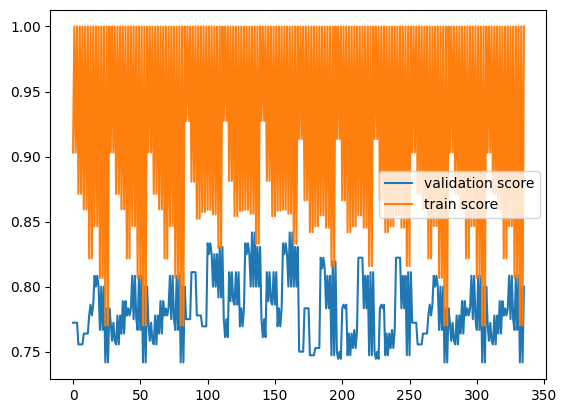

In [412]:
validation_scores = grid_search.cv_results_['mean_test_score']
train_scores = grid_search.cv_results_['mean_train_score'] 
plt.plot(validation_scores, label='validation score')
plt.plot(train_scores, label='train score')
plt.legend(loc='best')
plt.show()

In [413]:
y_pred=grid_search.predict(X_test1) 

test_accuracy=accuracy_score(y_test1,y_pred)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 83.33%


# Ridge regression (Tikonov reg)
###### Loss penalized with lambda (alpha on sklearn)
######  small lambda --> risk of overfitting (with complex model)
######  high lambda --> risk of underfitting (focus on second term)

# Prepare data

In [134]:
monk1_train = pd.read_csv('data/monks-1.train',header=None,sep=" ")
monk1_test = pd.read_csv('data/monks-1.test',header=None,sep=" ")

monk1_train.drop(0,axis=1,inplace=True)
monk1_train.drop(8,axis=1,inplace=True)

monk1_test.drop(0,axis=1,inplace=True)
monk1_test.drop(8,axis=1,inplace=True)


columns = ['class', 'a1', 'a2', 'a3', 'a4', 'a4', 'a6']
monk1_train.columns = columns
monk1_test.columns = columns

ytr = monk1_train.iloc[:,0]
xtr = monk1_train.iloc[:,1:]
xts = monk1_test.iloc[:,1:]
yts = monk1_test.iloc[:,0]

# Scaling
scaler = StandardScaler()
xtr = scaler.fit_transform(xtr)
xts = scaler.fit_transform(xts)

In [135]:
# (xtr, ytr) ; (xts, yts)

In [136]:
r = RidgeClassifier()

In [137]:
alphas = [0.001,0.01,0.05,0.1, 1.0, 10.0]


param_grid = dict(alpha=alphas)
  
# defining parameter range
grid = GridSearchCV(r, param_grid, cv=60, scoring='accuracy', return_train_score=True,verbose=1,refit=True)
  
# fitting the model for grid search
grid_search=grid.fit(xtr, ytr)

Fitting 60 folds for each of 6 candidates, totalling 360 fits


In [138]:
print(grid_search.best_params_)

{'alpha': 10.0}


In [139]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 69.44%


In [140]:
y_pred=grid_search.predict(xts) 

test_accuracy=accuracy_score(yts,y_pred)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 66.67%


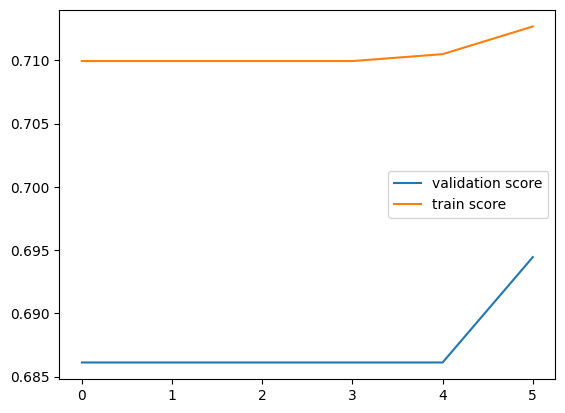

In [141]:
validation_scores = grid_search.cv_results_['mean_test_score']
train_scores = grid_search.cv_results_['mean_train_score'] 
plt.plot(validation_scores, label='validation score')
plt.plot(train_scores, label='train score')
plt.legend(loc='best')
plt.show()

In [159]:
param_range = [0.1,11.0]
train_scores, validation_scores = validation_curve(r, xtr, ytr, param_name="alpha", cv=60, param_range=param_range)

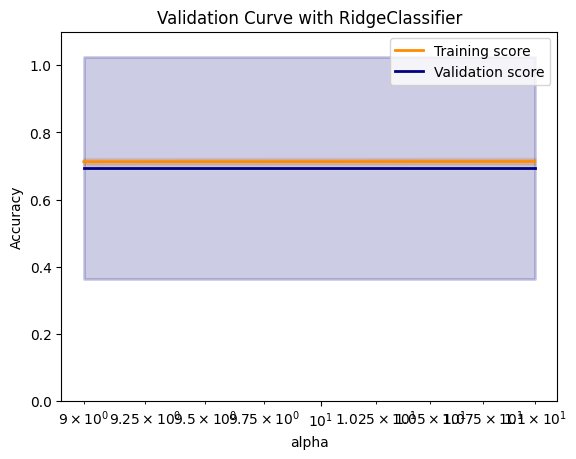

In [160]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

plt.title("Validation Curve with RidgeClassifier")
plt.xlabel("alpha")
plt.ylabel("Accuracy")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    param_range, validation_scores_mean, label="Validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    validation_scores_mean - validation_scores_std,
    validation_scores_mean + validation_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()

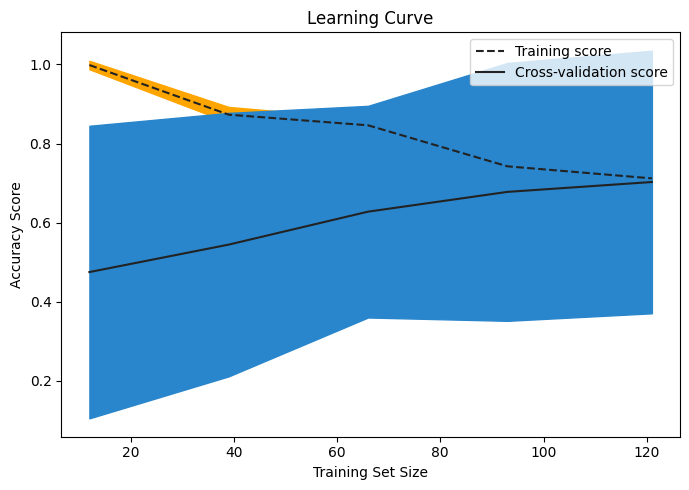

In [163]:
train_sizes, train_scores, test_scores = learning_curve(r, xtr, ytr, cv=60, scoring='accuracy', n_jobs=-1, 
                                                        )
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(7,5))
plt.plot(train_sizes, train_mean,'--', color="#222222",  label="Training score")
plt.plot(train_sizes, test_mean, color="#222222", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#FFA500")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#2986CC")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()